In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [2]:
#Задание 1

hr = pd.read_csv('HR.csv')

In [27]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
#Задание 2
print('satisfaction_level')
print('Среднее:', hr['satisfaction_level'].mean())
print('Медиана:',hr['satisfaction_level'].median())
print('Мода:',hr['satisfaction_level'].mode()[0])
print('Минимум:',hr['satisfaction_level'].min())
print('Максимум:',hr['satisfaction_level'].max())
print('Сред. отклонение:',hr['satisfaction_level'].std())
print('---------------------------------')
print('last_evaluation')
print('Среднее:', hr['last_evaluation'].mean())
print('Медиана:',hr['last_evaluation'].median())
print('Мода:',hr['last_evaluation'].mode()[0])
print('Минимум:',hr['last_evaluation'].min())
print('Максимум:',hr['last_evaluation'].max())
print('Сред. отклонение:',hr['last_evaluation'].std())
print('---------------------------------')
print('number_project')
print('Среднее:', hr['number_project'].mean())
print('Медиана:',hr['number_project'].median())
print('Мода:',hr['number_project'].mode()[0])
print('Минимум:',hr['number_project'].min())
print('Максимум:',hr['number_project'].max())
print('Сред. отклонение:',hr['number_project'].std())
print('---------------------------------')
print('average_montly_hours')
print('Среднее:', hr['average_montly_hours'].mean())
print('Медиана:',hr['average_montly_hours'].median())
print('Мода:',hr['average_montly_hours'].mode()[0])
print('Минимум:',hr['average_montly_hours'].min())
print('Максимум:',hr['average_montly_hours'].max())
print('Сред. отклонение:',hr['average_montly_hours'].std())
print('---------------------------------')
print('time_spend_company')
print('Среднее:', hr['time_spend_company'].mean())
print('Медиана:',hr['time_spend_company'].median())
print('Мода:',hr['time_spend_company'].mode()[0])
print('Минимум:',hr['time_spend_company'].min())
print('Максимум:',hr['time_spend_company'].max())
print('Сред. отклонение:',hr['time_spend_company'].std())
print('---------------------------------')

satisfaction_level
Среднее: 0.6128335222348156
Медиана: 0.64
Мода: 0.1
Минимум: 0.09
Максимум: 1.0
Сред. отклонение: 0.24863065106114257
---------------------------------
last_evaluation
Среднее: 0.7161017401160078
Медиана: 0.72
Мода: 0.55
Минимум: 0.36
Максимум: 1.0
Сред. отклонение: 0.17116911062327533
---------------------------------
number_project
Среднее: 3.80305353690246
Медиана: 4.0
Мода: 4
Минимум: 2
Максимум: 7
Сред. отклонение: 1.2325923553183522
---------------------------------
average_montly_hours
Среднее: 201.0503366891126
Медиана: 200.0
Мода: 135
Минимум: 96
Максимум: 310
Сред. отклонение: 49.94309937128408
---------------------------------
time_spend_company
Среднее: 3.498233215547703
Медиана: 3.0
Мода: 3
Минимум: 2
Максимум: 10
Сред. отклонение: 1.4601362305354812
---------------------------------


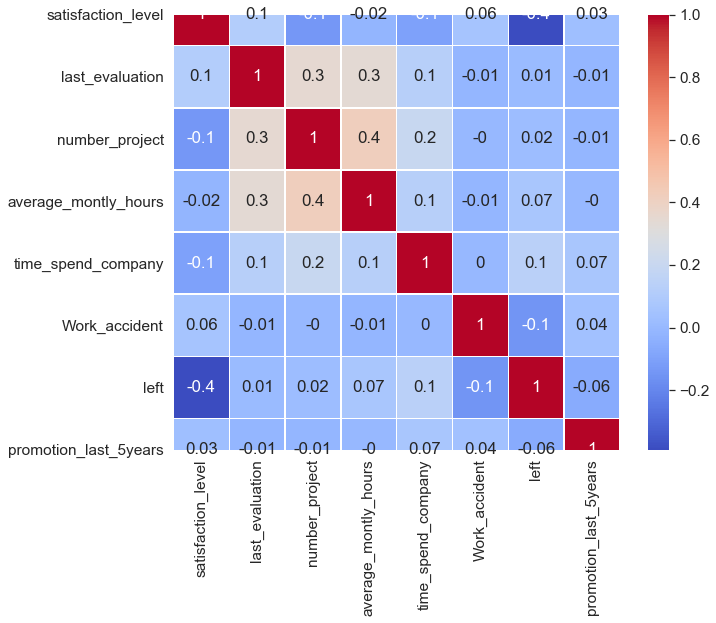

In [46]:
#Задание 3 

corr_matrix = hr.corr().round(2)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=corr_matrix, annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')

#ВОПРОС - ПОЧЕМУ У МЕНЯ ВЕРХНИЕ ЯЧЕЙКИ НЕ ПОЛНОСТЬЮ ОТОБРАЖАЮТСЯ?

**ВЫВОД:**
1. две самые скоррелированные переменные - average_montly_hours и  number_project
2. две наименее скоррелированные переменные - average_montly_hours и  satisfaction_level

In [52]:
#Задание 4

hr.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

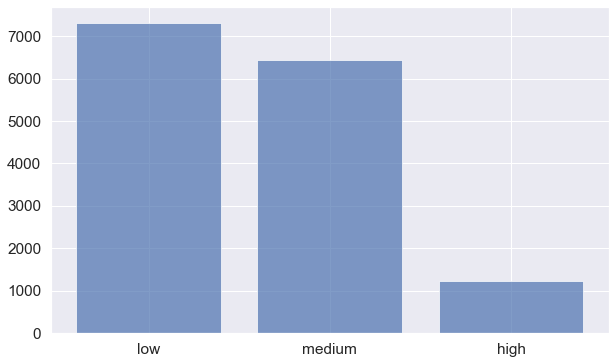

In [75]:
#Задание 5

sals = hr.salary.value_counts()
vals = hr['salary'].unique()
fig = plt.figure(figsize =(10, 6))
plt.bar(['low','medium','high'], sals, alpha=0.7)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

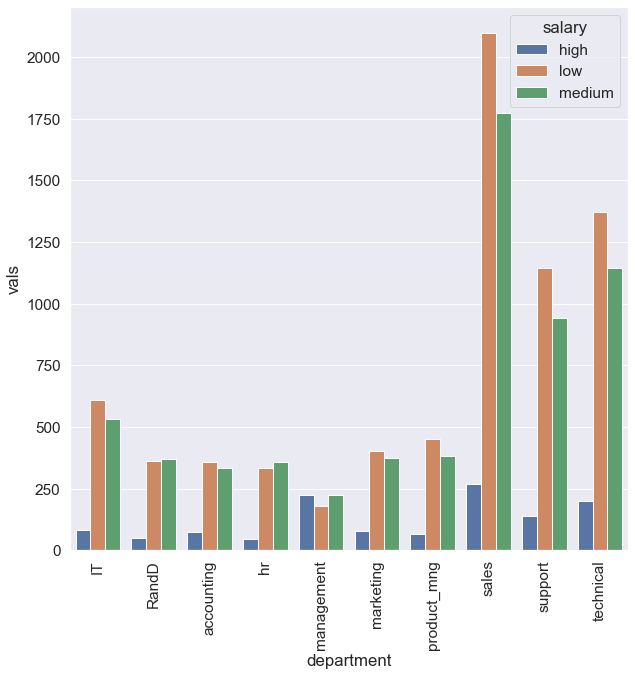

In [126]:
#Задание 6

hr1 = hr.groupby(['department', 'salary']).agg(vals=("salary", 'count')).reset_index()
fig = plt.figure(figsize =(10, 10))
sns.barplot(x='department', y='vals', hue="salary", data=hr1)
plt.xticks(rotation=90)

**Задание 7**

Алгоритм действий:
1. Сделаем отдельный df с данными о average_montly_hours и salary (high,low)
2. Определим какое распределние и какие у нас выборки (зависимые или независимые). **Распределение - Ненормальное** и **Выборка - Независимая** - ПОПРАВЬТЕ МЕНЯ ЕСЛИ Я ОШИБСЯ
3. Определим исходя из Шага 2, какой критерий будем использовать. **Критерий Манна-Уитни**
4. Можно визуализировать данные на boxplot. **Получаем интересную картину...**
5. Формируем гипотезу:
6. H0 - Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом **+**
7. H1 - Сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом

In [4]:
df = hr[['average_montly_hours','salary']]

In [9]:
df = df[df['salary'].isin(['low','high'])]

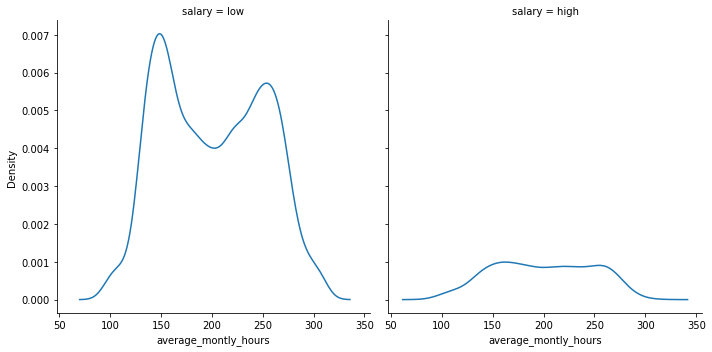

In [24]:
sns.displot(df,x='average_montly_hours',col='salary',kind='kde')

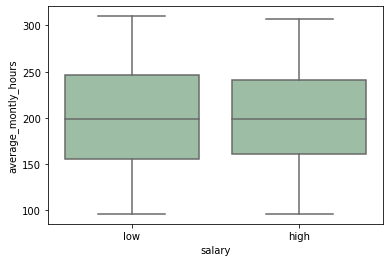

In [25]:
ax = sns.boxplot(x='salary', y='average_montly_hours', data=df, color='#99c2a2')

In [35]:
A = df.loc[(df['salary'] == 'high')]['average_montly_hours'].to_numpy()
B = df.loc[(df['salary'] == 'low')]['average_montly_hours'].to_numpy()

stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p*100))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4507096.500, p=41.207
Одинаковые распределения (не отвергаем H0)


Вывод: Получаем очень большое значение p value, и заключем, что Нулевую гипотезу отвергнуть не можем и можем сказать, что статистически **незначимо** Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. 
ПОПРАВЬТЕ МЕНЯ ЕСЛИ Я ОШИБСЯ.

In [41]:
#Задание 8

left_yes = hr[hr['left'] == 1]
left_no = hr[hr['left'] == 0]

In [76]:
num_yes = left_yes.groupby('promotion_last_5years')['promotion_last_5years'].count().to_numpy()
num_no = left_no.groupby('promotion_last_5years')['promotion_last_5years'].count().to_numpy()

In [89]:
total = num_yes[0] + num_yes[1]
ratio1 = num_yes[1] / total
sat_yes = left_yes['satisfaction_level'].mean()
pr_yes = left_yes['number_project'].mean()
print('Доля сотрудников с повышением за последние 5 лет (уволившиеся):', ratio1*100,'%')
print('Средняя степень удовлетворености (уволившиеся):', sat_yes*100,'%')
print('Среднее количество проектов (уволившиеся):', pr_yes)
print('-----------')

total2 = num_no[0] + num_no[1]
ratio2 = num_no[1] / total2
sat_no = left_no['satisfaction_level'].mean()
pr_no = left_no['number_project'].mean()
print('Доля сотрудников с повышением за последние 5 лет (не уволившиеся):', ratio2*100,'%')
print('Средняя степень удовлетворености (не уволившиеся):', sat_no*100,'%')
print('Среднее количество проектов (не уволившиеся):', pr_no)
print('-----------')

Доля сотрудников с повышением за последние 5 лет (уволившиеся): 0.5320638476617194 %
Средняя степень удовлетворености (уволившиеся): 44.00980117614114 %
Среднее количество проектов (уволившиеся): 3.8555026603192384
-----------
Доля сотрудников с повышением за последние 5 лет (не уволившиеся): 2.6251312565628284 %
Средняя степень удовлетворености (не уволившиеся): 66.6809590479524 %
Среднее количество проектов (не уволившиеся): 3.786664333216661
-----------


**ПОДСКАЖИТЕ ПРАВИЛЬНО ЛИ ПОСЧИТАЛ СРЕДНЮЮ СТЕПЕНЬ УДОВЛЕТВОРЕННОСТИ???**

In [3]:
#Задание 9

In [5]:
hr2 = hr[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]

In [11]:
data = hr2[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
target = hr2.left.to_numpy()

In [37]:
#Разделите данные на выборку для обучения и тестирования

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [38]:
#Постройте модель LDA

lda = LinearDiscriminantAnalysis()

In [39]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [44]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [45]:
y_test

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [41]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head()

,0,1
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


In [42]:
#Оцениваем качество модели

acc = accuracy_score(y_test, lda.predict(X_test))
print('Точность:', round(acc*100,2),'%')

Точность: 75.53 %


**ПОДСКАЖИТЕ, КАК Я МОГУ УВЕЛИЧИТЬ ТОЧНОСТЬ МОДЕЛИ? ИБО 75% НЕ САМАЯ ВЫСОКАЯ ТОЧНОСТЬ. МОЖЕТЕ ПОДСКАЗАТЬ УРОКИ, ССЫЛКИ И ТАКЖЕ ВАШ КРАТКИЙ АЛГОРИТМ ДЕЙСТВИЙ. СПАСИБО**